# Type I, Type II errors, link to hypothesis testing with code

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The purpose of a hypothesis test is to determine if the sample data provide sufficient evidence to reject the null hypothesis for the entire population.

Making a statistical decision based on the sample data always contains uncertainties due to sampling error.

Type I error: false positive, rejecting null when it is true (saying there is a difference when in fact there isn't)
Type II error: false negative, failing to reject the null, when it is false. 

$\alpha$: probability of making a type I error <br>
$\beta$: probability of making a type II error

Typically, <b>α = 0.05</b> means if we repeat the hypothesis tests many times with different sets of sample data, we expect that 5% of the time we incorrectly reject the null hypothesis when it is true, and 95% of the time we won’t reject the null hypothesis. (sampling distribution of the sample mean under the assumption that null is true

Power = 1 - $\beta$ <br>
Since $\beta$ is the probability of making a type II error, which means failing the detect a difference when in fact there is. 
Conversely, power is defined as the probability of correctly rejecting the null hypothesis when it is false.

Prepare our data

In [42]:
mu1, sigma1 = 0, 1 # mean and standard deviation
mu2, sigma2 = 3, 1
group1 = np.random.normal(mu1, sigma1, 1000)
group2 = np.random.normal(mu2, sigma2, 1000)

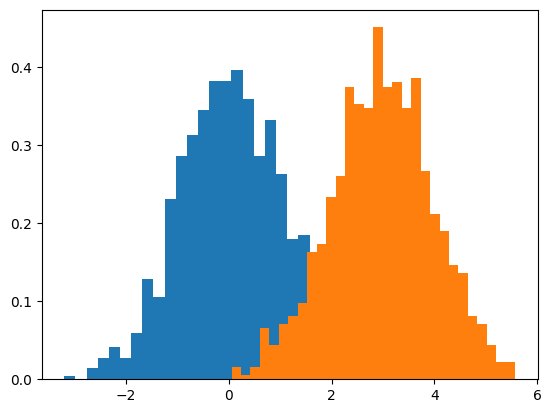

In [43]:
count, bins1, ignored = plt.hist(group1, 30, density=True) # sampling distribution of the sampling mean assuming null is true
count, bins2, ignored = plt.hist(group2, 30, density=True) # sampling distribution of the sampling mean assuming null is false

In [44]:
def gaussian_pdf(mu, sigma, bins):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

Let's set the false positive rate to: alpha = 0.05 and plot the null and alternative hypothesis to see how alpha, beta and power relate

In [ ]:
from scipy.stats import norm

In [52]:
norm.cdf(1.65, loc = mu1, scale = sigma1)

0.9505285319663519

In [53]:
alpha = 0.95
value_at_alpha = norm.ppf(alpha, loc = mu1, scale = sigma1) # inverse cdf
print(value_at_alpha)

1.6448536269514722


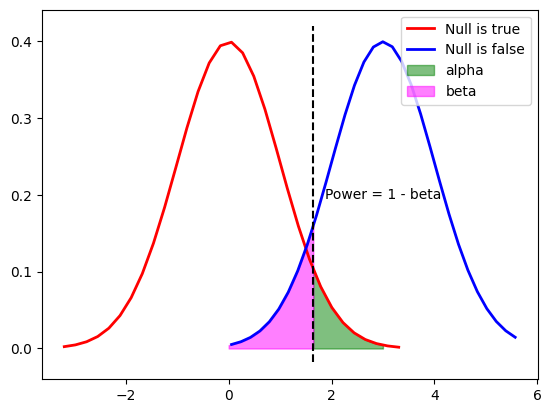

In [59]:
plt.plot(bins1, gaussian_pdf(mu1, sigma1, bins1),
    linewidth=2, color='r', label = "Null is true")
plt.plot(bins2,  gaussian_pdf(mu2, sigma2, bins2),
    linewidth=2, color='b', label = "Null is false")
ylim = plt.gca().get_ylim()
plt.plot([value_at_alpha, value_at_alpha],ylim, '--k')

# fill in alpha
alpha_x = np.linspace(value_at_alpha, 3, 100)
alpha_y = norm.pdf(alpha_x, loc = mu1, scale = sigma1)
plt.fill_between(alpha_x, alpha_y, color='green', alpha=0.5, label='alpha')

# fill in beta
beta_x = np.linspace(0, value_at_alpha, 100)
beta_y = norm.pdf(beta_x, loc = mu2, scale = sigma2)
plt.fill_between(beta_x, beta_y, color='magenta', alpha=0.5, label='beta')
plt.text(3, 0.2, 'Power = 1 - beta', ha='center', va='center')

plt.legend(loc='upper right')


When the null hypothesis is true (red curve), we only need to worry about alpha, or making a Type I error.  <br>

If the alternative hypothesis is true (blue curve), we only need to worry about beta and power. But ofcourse, we do not know before doing the analysis, which one is true. 

<b>The Trade-off between alpha and beta</b>

if you increase alpha, you beta will decrease. Which error are we better off making? This depends on your question. 
For example, if you are developing a test for bacteria in a pool to decide if you want to change the water and you have:
5% false positive rate - in 5% of the cases you will incorrectly find bacteria and change the water when you didn't have to
10% false negative rate - in 10% of the cases you fail to detect bactiera and fail to change the water

In the case, it might be better to increase the false positive rate, so that you decrease the false negative rate, to err on the safe side. 
Also when alpha increases, Power also increases, because you're more likely to conclude that the null is false.

Ways to increase power:
1) increase sample size
2) increase alpha

Sources: 
https://medium.com/geekculture/which-is-worse-type-i-or-type-ii-errors-f40a0f040fcc

